In [51]:
# libreria para trabajar con mapas 
import folium 
import pandas as pd

In [52]:
# Primero creamos el mapa con la libreria folium y la funcion Map,tiles es el proveedor del mapa.
#El mapa esta centrado en valdivia
map = folium.Map(location = [-39.81422,-73.24589], tiles = "OpenStreetMap", zoom_start = 11)

#Aca estoy cargando el set de datos que subi a la carpeta.
datos = pd.read_excel('base_ssr.xlsx', sheet_name='Sistemas_APR',usecols="B:U",skiprows=2)

datos_lat=datos.iloc[1963:1977,19] 
datos_long=datos.iloc[1963:1977,18]
datos_nombres=datos.iloc[1963:1977,12]


nombres = list(datos_nombres)
locations = list(zip(datos_lat, datos_long))



#Aca agregamos un marcador con la ubicación de valdivia
for i in range(len(locations)):
    nombre=nombres[i]
    folium.Marker(location=locations[i],tooltip=nombre).add_to(map)


for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=5).add_to(map)
map

# Aca estoy agregando un minimap en la esquina,para esto hay que cargar la funcion plugins desde la libreria folium
from folium import plugins
minimap = plugins.MiniMap()
map.add_child(minimap)
map


In [53]:
from folium import plugins
map = folium.Map(location = [-39.81422,-73.24589], tiles = "OpenStreetMap", zoom_start = 11)

datos_beneficiarios=datos.iloc[1963:1977,9]
beneficiarios = list(datos_beneficiarios)

colormap = folium.StepColormap(colors=['green','yellow','orange','red','purple'] ,
                           index=[121,298,546,964,2294,4021],
                           vmin= 121,
                           vmax=4021)
map = folium.Map(location = [-39.81422,-73.24589], tiles = "OpenStreetMap", zoom_start = 11)
for i in range(len(locations)):
    folium.Circle(location=locations[i],radius=100,color=colormap(beneficiarios[i]),).add_to(map)
    nombre=nombres[i]
map

In [54]:
map = folium.Map(location = [-39.81422,-73.24589], tiles = "OpenStreetMap", zoom_start = 11)

color_beneficiario=[]

for j in range(len(locations)):
    u=beneficiarios[j]
    if u<299:
        colores='darkred'
    if u>=299 and u<546:
        colores='green'
    if u>=546 and u<964:
        colores='orange'
    if u>=964 and u<2294:
        colores='red'               
    if u>=2294:
        colores='darkpurple'
    color_beneficiario.append(colores)
    folium.Marker(
    location=locations[j],
    popup="Punto",
    tooltip=nombres[j],
    icon=folium.Icon(color=colores),
).add_to(map)
    
map

In [55]:
import pandas as pd
tabla = pd.DataFrame()
tabla['Nombre Ubicación'] = None
tabla['Beneficiarios']=None
tabla['Color']=None

nombres = list(df_nombres)

beneficio = list(df_beneficio)
color_b=list(color_beneficiario)

tabla['Nombre Ubicación'] = nombres
tabla['Beneficiarios'] = beneficio
tabla['Color'] = color_b

print(tabla)

            Nombre Ubicación  Beneficiarios       Color
0                  PISHUINCO          322.0       green
1                  CURIÑANCO         2294.0  darkpurple
2                 HUELLELHUE          310.0       green
3               LAS GAVIOTAS         1048.0         red
4         NIEBLA-LOS MOLINOS         4021.0  darkpurple
5                   PUNUCAPA          459.0       green
6   SAN IGNACIO-PLAYA ROSADA          936.0      orange
7               TRES ESPINOS         1091.0         red
8             VILLA CAYUMAPU         1327.0         red
9     EL ARENAL SANTA ELVIRA          549.0      orange
10                   PAILLAO          871.0      orange
11               CABO BLANCO          543.0       green
12            EL ARENAL KM 2          623.0      orange
13                 Chabelita          434.0       green


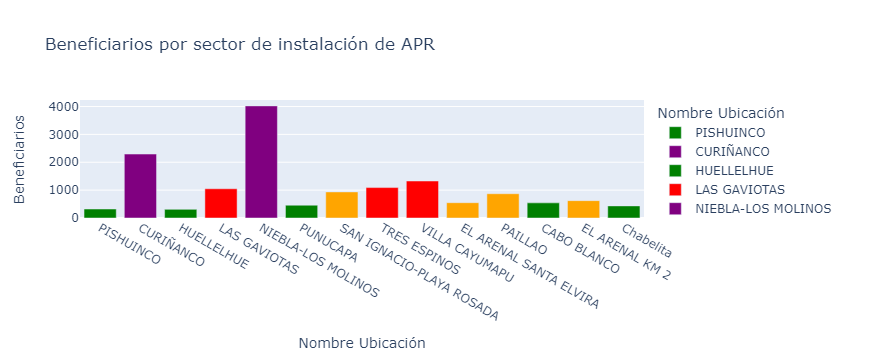

In [56]:
import plotly.express as px
#Aca estamos llamando al set de datos de la tabla,que viene precargado en la librería

fig = px.bar(tabla, x="Nombre Ubicación", y="Beneficiarios",color="Nombre Ubicación",title="Beneficiarios por sector de instalación de APR",
             color_discrete_sequence=["green", "purple", "green", "red", "purple","green",
                                      "orange", "red", "red", "orange", "orange", "green", "orange", "green"])
fig.show()


